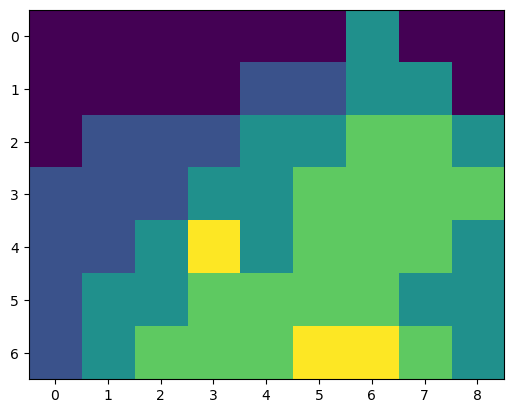

In [37]:
# 1- Exemple minimal : on s'affranchit de la gestion de coordonnées du fichier vecteur...

import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Polygon, mapping
from rasterio.features import shapes
import fiona
from fiona.crs import from_epsg

# epsg
epsg = 4326

# Un raster ocs sommaire
l1 = [
    [1,1,1,1,1,1,3,1,1],
    [1,1,1,1,2,2,3,3,1],
    [1,2,2,2,3,3,4,4,3],
    [2,2,2,3,3,4,4,4,4],
    [2,2,3,5,3,4,4,4,3],
    [2,3,3,4,4,4,4,3,3],
    [2,3,4,4,4,5,5,4,3],
]

# En numpy array
nd_arr = np.array(l1)
plt.imshow(nd_arr)

schema = {
    'geometry': 'Polygon',
    'properties': {
        'val': 'int'
    }
}

with fiona.open('_files/your_shapefile.shp', 'w', crs=from_epsg(4326), driver='ESRI Shapefile', schema=schema) as output:
    for sh in shapes(nd_arr):
        p, val = sh[0]['coordinates'][0], int(sh[1]) 
        poly = Polygon(p)
        output.write({'geometry': mapping(poly), 'properties': {'val': val}})
